# HR Analytics Project- Understanding the Attrition in HR


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Code: Importing the Dataset 

In [2]:
dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition[1].csv")

In [3]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Exploratory Data Analysis

In [5]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Types

In [9]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
# Mapping the Attrition 1 -yes and 0 -no in the new collumn 

dataset["left"] =np.where(dataset["Attrition"] == "Yes",1,0)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [15]:
#Supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

Remove not useful features 

In [36]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical  variables and its effect on attribution"""
    fig, ax = plt.subplots(ncols=2, figsize = (14,6))
    
    #Boxplot for comparsion 
    sns.boxplot(x=target_var, y=segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot 
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.displot(a= df[segment_by], ax=ax[1], kde= False)
    
    plt.show()

In [37]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

# Analyizing the variables


Numerical Variables


# Visualizing the Data

<AxesSubplot:>

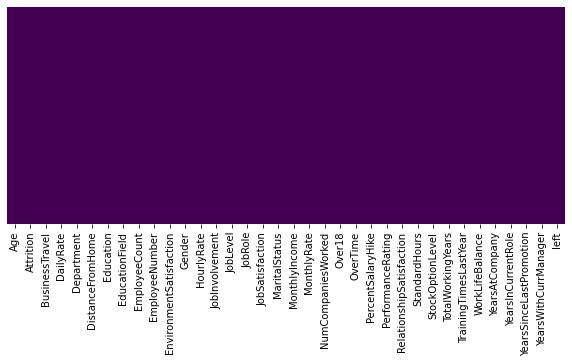

In [16]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

So now we can say that there is no missing value in the dataset 

There is binay classification problem, so the Distribution of instances among the 2 classes, is visulaized below:

<AxesSubplot:xlabel='Attrition', ylabel='count'>

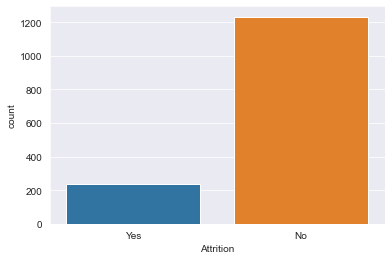

In [17]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = dataset)

**Monthly Income**

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

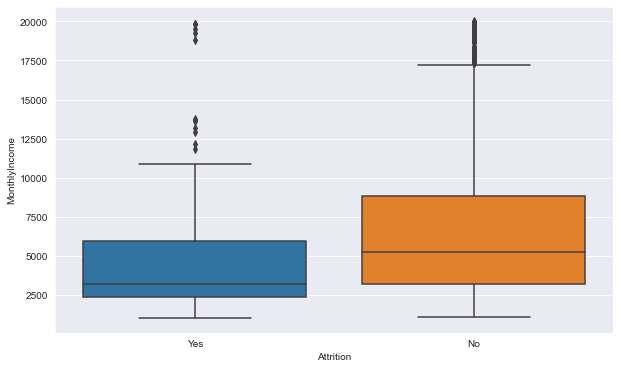

In [19]:

plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = dataset)

# Analyizing the variables


# Age


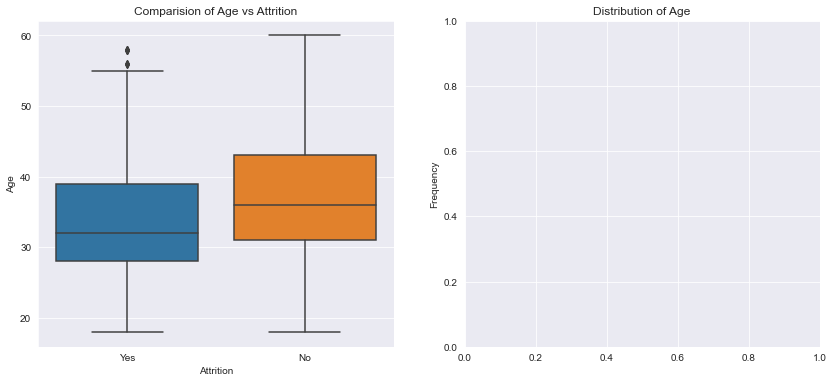

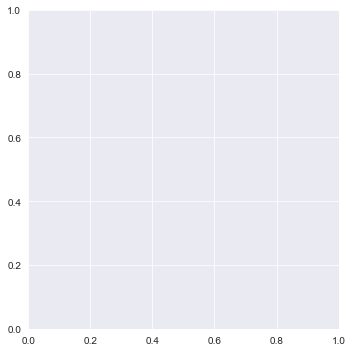

In [42]:
# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(dataset,segment_by="Age")

**Daily Rate**

**Hourly Rate**

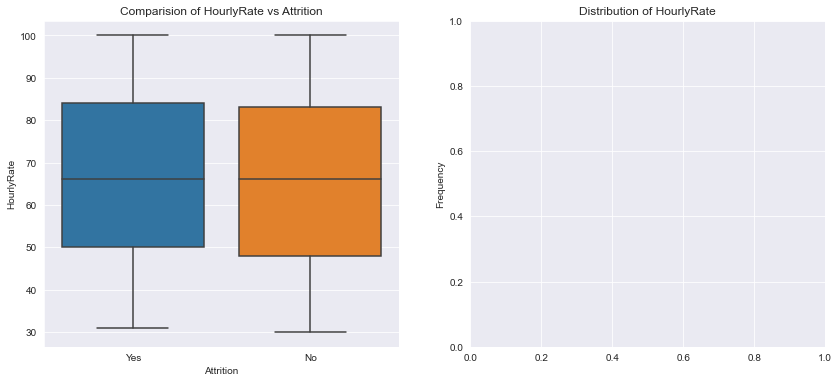

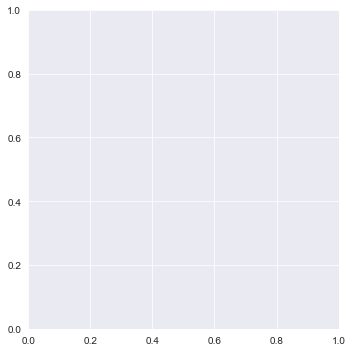

In [45]:
NumericalVariables_targetPlots(dataset,"HourlyRate")

**PercentSalaryHike**


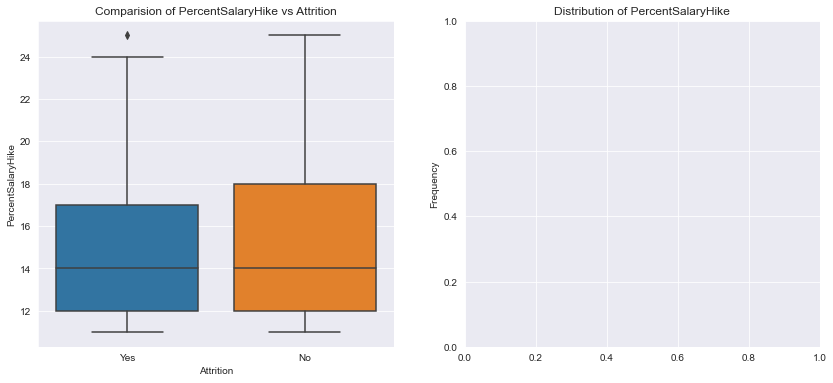

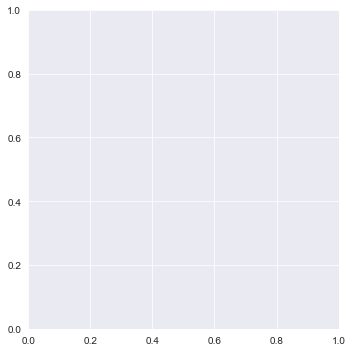

In [46]:
NumericalVariables_targetPlots(dataset,"PercentSalaryHike")

Total Working years


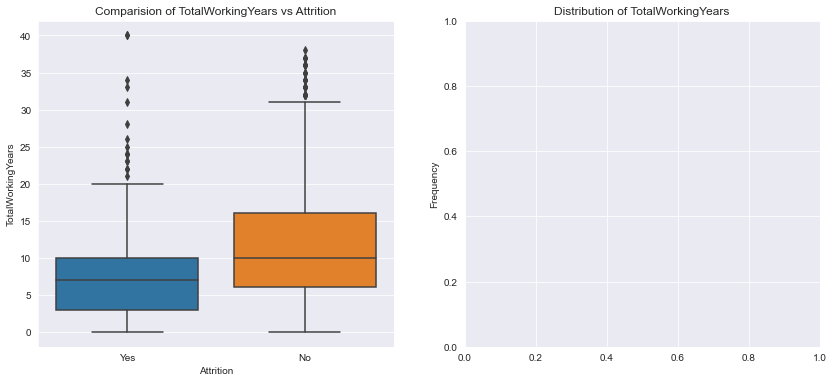

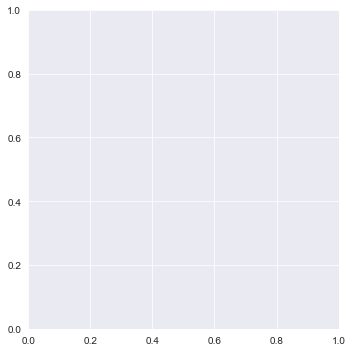

In [47]:
NumericalVariables_targetPlots(dataset,"TotalWorkingYears")

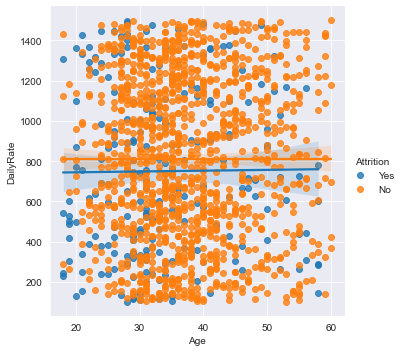

In [48]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = dataset)

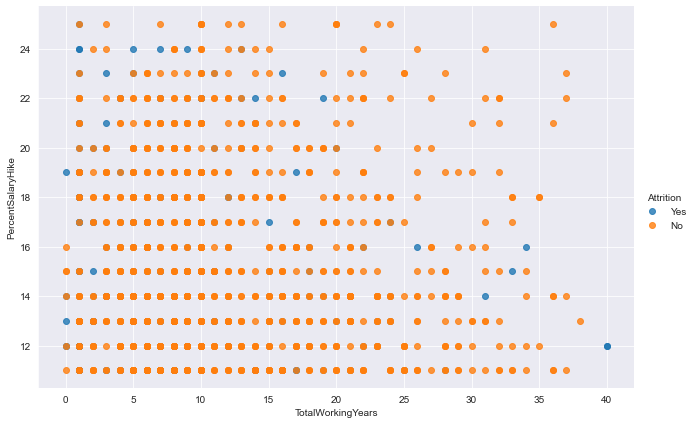

In [49]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=dataset,fit_reg=False,hue="Attrition",size=6,
           aspect=1.5)

plt.show()

# Distance From Home


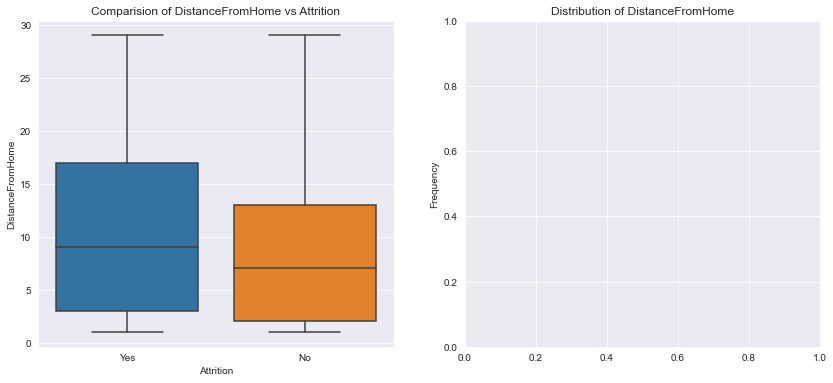

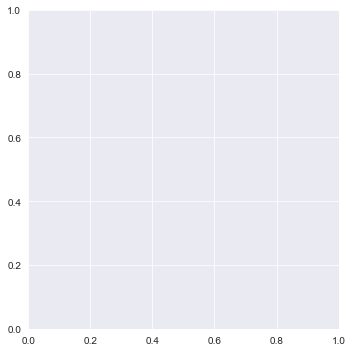

In [50]:
NumericalVariables_targetPlots(dataset,"DistanceFromHome")

There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases

# Analyizing the variables


Categorical Variables


# Job Involvement


In [52]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(dataset.JobInvolvement,dataset.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [54]:
#calculating the percentage of people having different job involvement rate
round(dataset.JobInvolvement.value_counts()/dataset.shape[0] * 100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

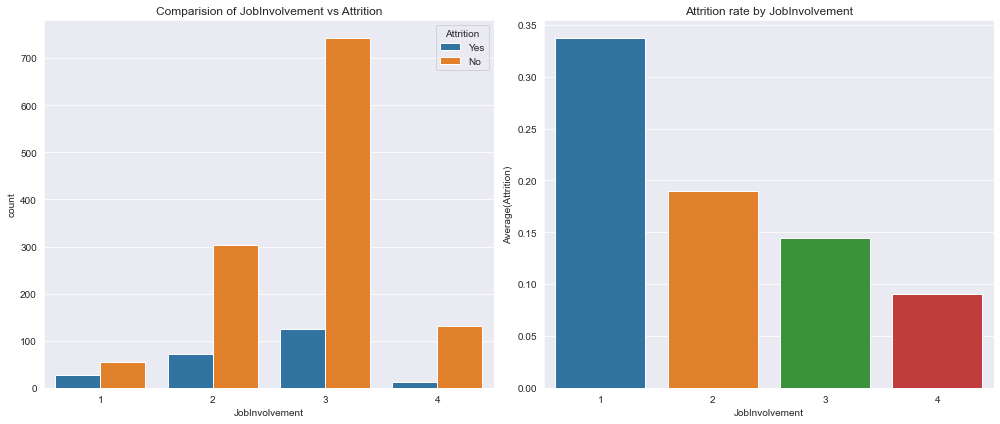

In [55]:
CategoricalVariables_targetPlots(dataset,"JobInvolvement")

1. In the total data set, 59% have high job involvement whereas 25% have medium involvement rate


2. From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.


3. Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company


# Job Satisfaction


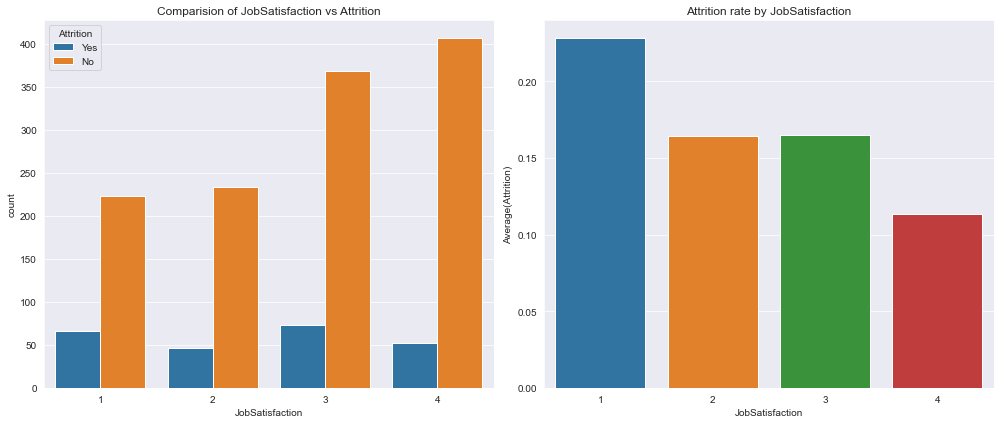

In [56]:
CategoricalVariables_targetPlots(dataset,"JobSatisfaction")


As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

# Performance Rating


In [57]:
#checking the number of categories under performance rating
dataset.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [58]:
#calculate the percentage of performance rating per category in the whole dataset
round(dataset.PerformanceRating.value_counts()/dataset.shape[0] * 100,2)

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

Around 85% of people in the company rated as Excellent and remaining 15% rated as Outstanding



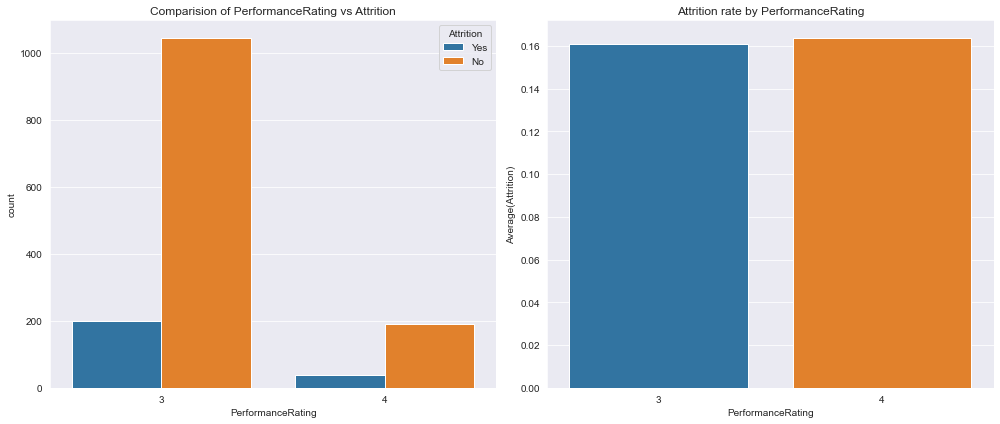

In [59]:
CategoricalVariables_targetPlots(dataset,"PerformanceRating")


Contrary to normal belief that employee's having higher rating will not leave the company. It may be seen that there is no significant difference between the performance rating and Attrition Rate.

# RelationshipSatisfaction

In [60]:
#percentage of each relationship satisfaction category across the data
round(dataset.RelationshipSatisfaction.value_counts()/dataset.shape[0],2)

3    0.31
4    0.29
2    0.21
1    0.19
Name: RelationshipSatisfaction, dtype: float64

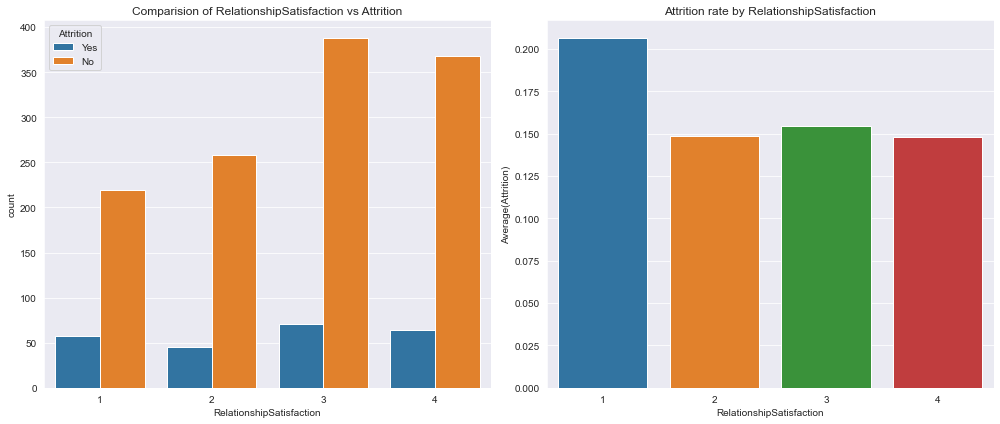

In [61]:

CategoricalVariables_targetPlots(dataset,"RelationshipSatisfaction")

In this too, we found that almost 30% of employees with high and very high RelationshipSatisfaction have left the company. Here also there is no visible trend among the relationshipsatisfaction and attrition rate

# WorkLifeBalance

In [62]:
#percentage of worklife balance rating across the company data
round(dataset.WorkLifeBalance.value_counts()/dataset.shape[0],2)

3    0.61
2    0.23
4    0.10
1    0.05
Name: WorkLifeBalance, dtype: float64

More than 60% of the employee's rated that they have Better worklife balance and 10% rated for Best worklife balance



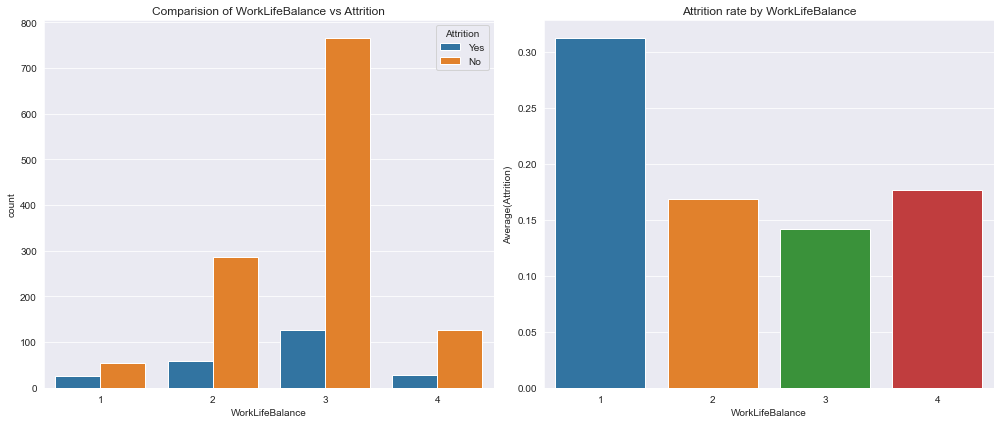

In [63]:
CategoricalVariables_targetPlots(dataset,"WorkLifeBalance")

As expected more than 30% of the people who rated as Bad WorkLifeBalance have left the company and around 15% of the people who rated for Best WorkLifeBalance also left the company

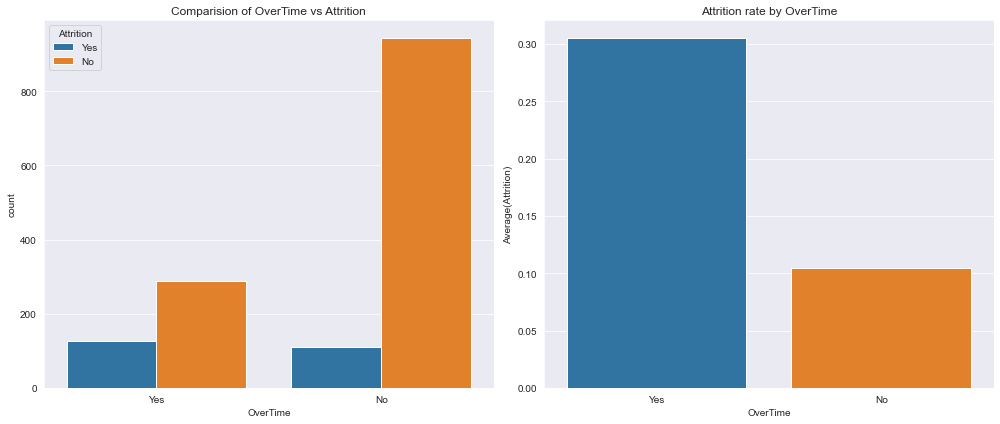

In [64]:
CategoricalVariables_targetPlots(dataset,"OverTime")

More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime has not left the company. Therefore overtime is a strong indicator of attrition

# Business Travel

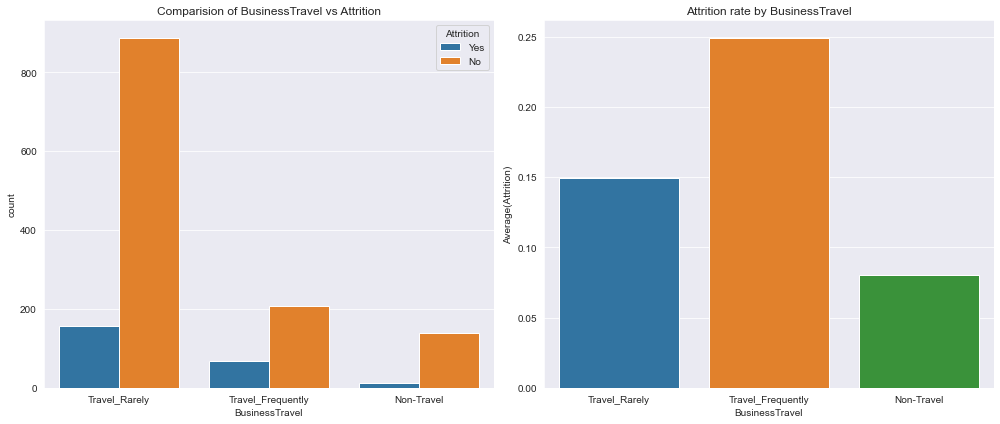

In [65]:
CategoricalVariables_targetPlots(dataset,segment_by="BusinessTravel")


There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

# Department


In [66]:
dataset.Department.value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

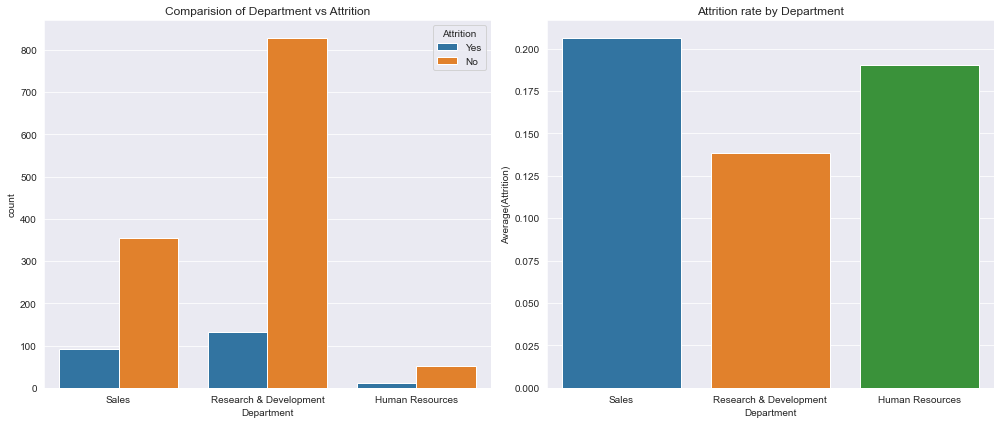

In [67]:
CategoricalVariables_targetPlots(dataset,segment_by="Department")

On comparing departmentwise,we can conclude that HR has seen only a marginal high in turnover rates whereas the numbers are significant in sales department with turnover rates of 39 %. The attrition levels are not appreciable in R & D where 67 % have recorded no attrition.

Sales has seen higher attrition levels about 20.6% followed by HR around 18%


# EducationField


In [68]:
dataset.EducationField.value_counts()


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

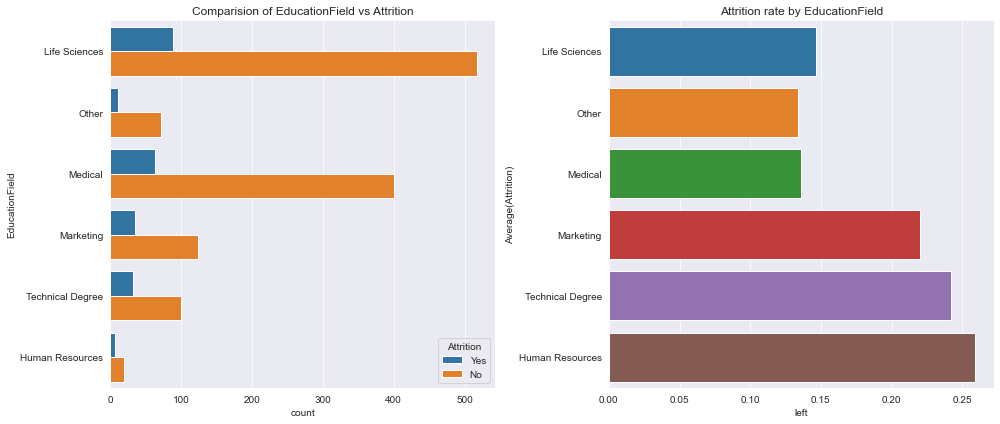

In [69]:
CategoricalVariables_targetPlots(dataset,"EducationField",invert_axis=True)

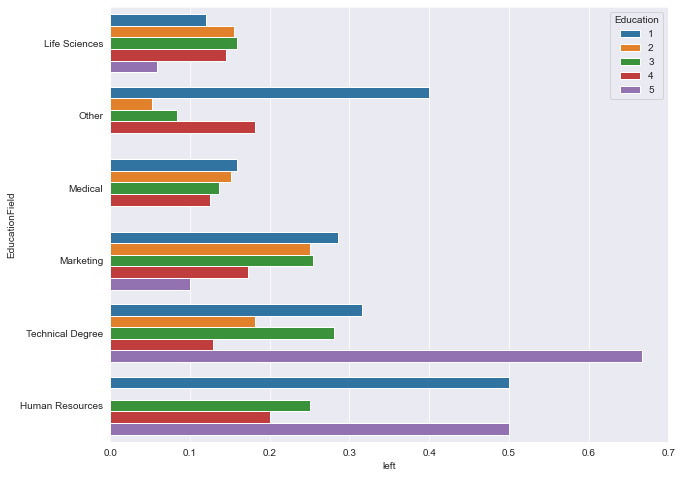

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=dataset,ci=None)
plt.show()

1. There are more people with a Life sciences followed by medical and marketing


2. Employee's in the EducationField of Human Resources and Technical Degree have highest attrition levels around 26% and 23% respectively


3. When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition

# Environment Satisfaction


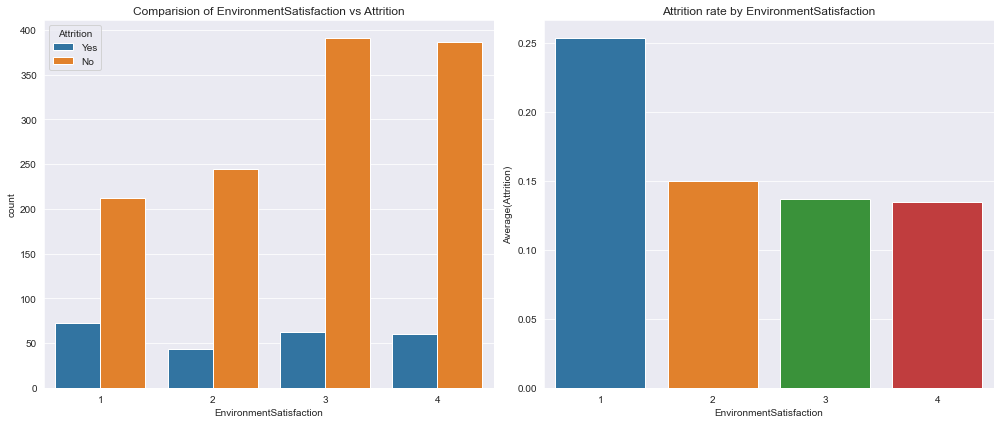

In [71]:
CategoricalVariables_targetPlots(dataset,"EnvironmentSatisfaction")

we can see that people having low environment satisfaction 25% leave the company



# Gender Vs Attrition


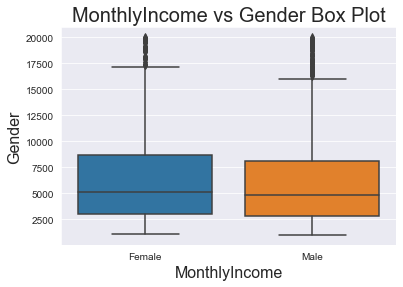

In [72]:
sns.boxplot(dataset['Gender'], dataset['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

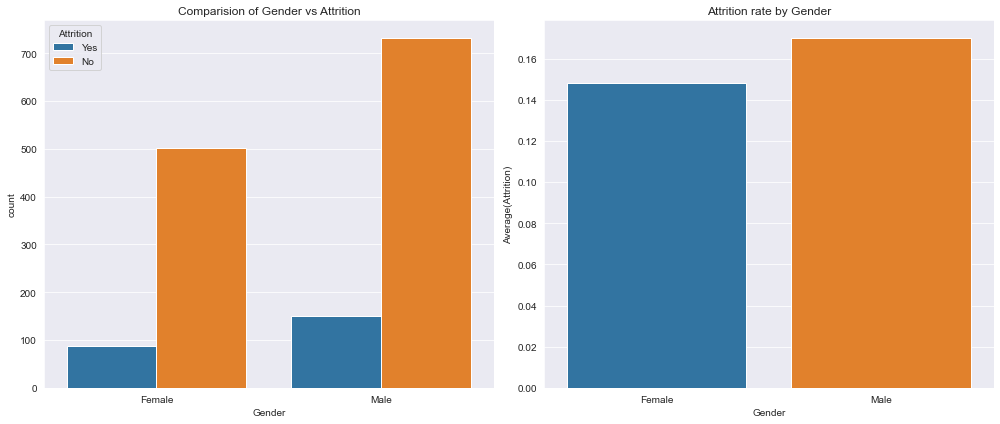

In [73]:
CategoricalVariables_targetPlots(dataset,"Gender")

Monthly Income distribution for Male and Female is almost similar, so the attrition rate of Male and Female is almost the same around 15%. Gender is not a strong indicator of attrition

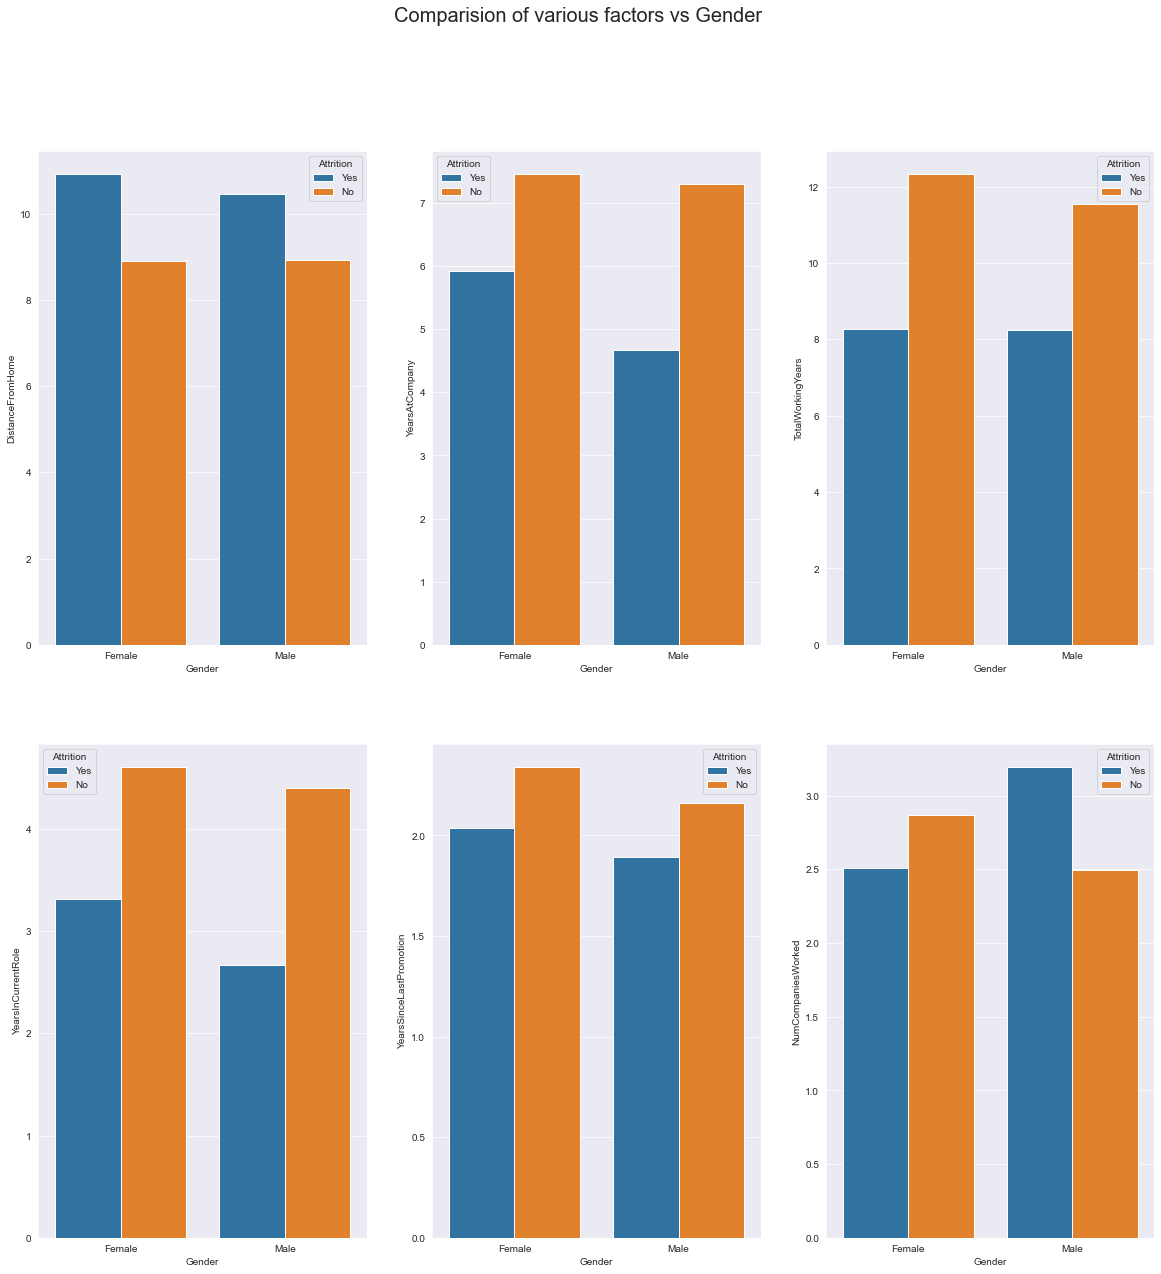

In [75]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               
# 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(dataset['Gender'],dataset['DistanceFromHome'],hue = dataset['Attrition'], ax = ax[0,0],ci=None); 
sns.barplot(dataset['Gender'],dataset['YearsAtCompany'],hue = dataset['Attrition'], ax = ax[0,1],ci=None); 
sns.barplot(dataset['Gender'],dataset['TotalWorkingYears'],hue = dataset['Attrition'], ax = ax[0,2],ci=None); 
sns.barplot(dataset['Gender'],dataset['YearsInCurrentRole'],hue = dataset['Attrition'], ax = ax[1,0],ci=None); 
sns.barplot(dataset['Gender'],dataset['YearsSinceLastPromotion'],hue = dataset['Attrition'], ax = ax[1,1],ci=None); 
sns.barplot(dataset['Gender'],dataset['NumCompaniesWorked'],hue = dataset['Attrition'], ax = ax[1,2],ci=None); 
plt.show()

1. Distance from home matters to women employees more than men.


2. Female employes are spending more years in one company compare to their counterpart.


3. Female employes spending more years in current company are more inclined to switch.

# Job Role


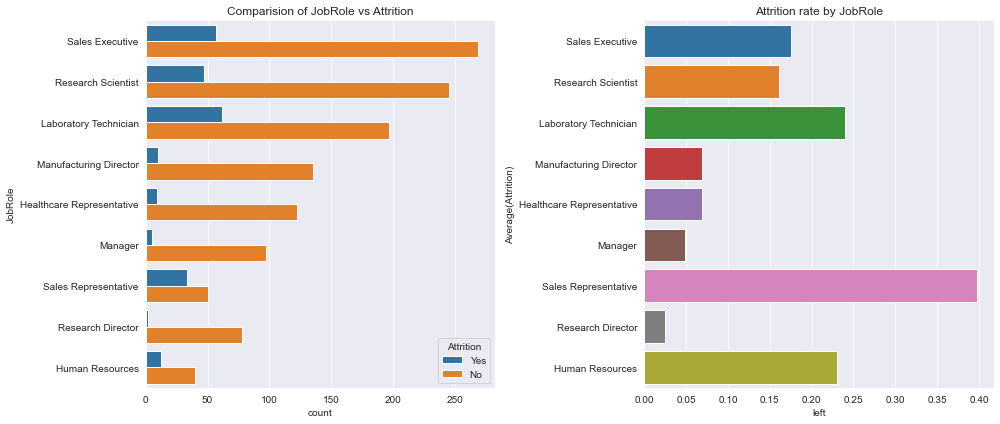

In [76]:
CategoricalVariables_targetPlots(dataset,"JobRole",invert_axis=True)


1. Jobs held by the employee is maximum in Sales Executive, then R&D , then Laboratory Technician


2. People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates are 40%, 24% and 22% respectively

# Marital Status


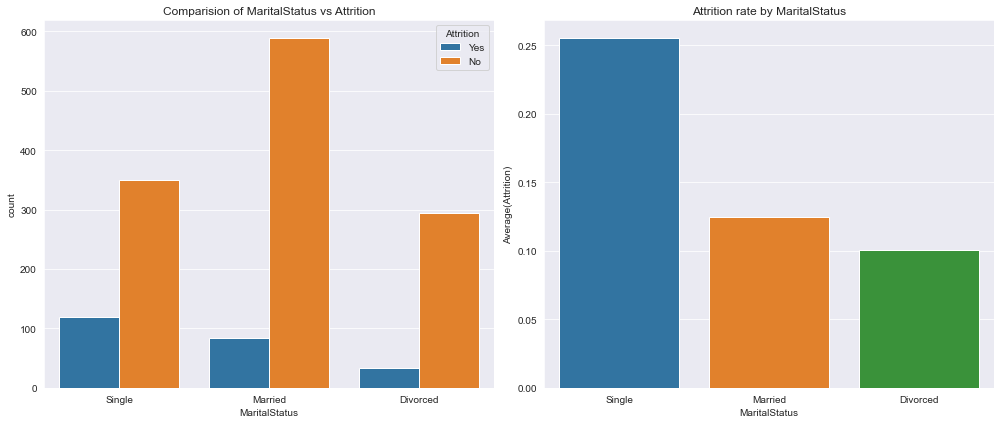

In [77]:
CategoricalVariables_targetPlots(dataset,"MaritalStatus")


From the plot,it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is a weak predictor of attrition

# Building Decision Tree


In [78]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

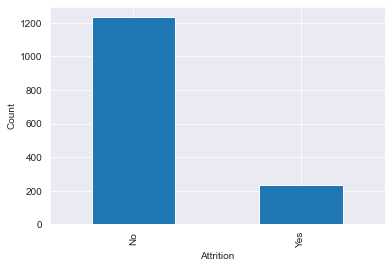

In [79]:
dataset.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [80]:
dataset["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

**From the Exploratory data analysis, variable that are not significant to attrition are:**



EmployeeCount, EmployeeNumber, Gender, HourlyRate, JobLevel, MaritalStatus, Over18, StandardHours


In [81]:
#copying the main employee data to another dataframe
dataset_new = dataset.copy()

In [82]:
#dropping the not significant variables
dataset_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

# Handling Categorical Variables


Segregate the numerical and Categorical variables


Convert Categorical variables to dummy variables

In [83]:
#data types of variables
dict(dataset_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [84]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(dataset_new.dtypes) if dict(dataset_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(dataset_new.dtypes) if dict(dataset_new.dtypes)[key] in ["object"]]

In [85]:
categorical_variable_names


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [86]:
#store the numerical variables data in seperate dataset

dataset_num = dataset_new[numeric_variable_names]

In [87]:
#store the categorical variables data in seperate dataset

dataset_cat = dataset_new[categorical_variable_names]
#dropping the attrition 
dataset_cat.drop(["Attrition"],axis=1,inplace=True)

In [88]:
#converting into dummy variables

dataset_cat = pd.get_dummies(dataset_cat)

In [89]:
#Merging the both numerical and categorical data

dataset_final = pd.concat([dataset_num, dataset_cat,dataset_new[["Attrition"]]],axis=1)

In [90]:
dataset_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,0,0,1,0,0,0,1,0,1,Yes
1,49,279,8,1,3,2,2,2,5130,24907,...,0,1,0,0,0,1,0,1,0,No
2,37,1373,2,2,4,2,1,3,2090,2396,...,0,0,0,0,0,0,1,0,1,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,...,0,1,0,0,0,1,0,0,1,No
4,27,591,2,1,1,3,1,2,3468,16632,...,0,0,0,0,0,1,0,1,0,No


In [91]:
#final features
features =  list(dataset_final.columns.difference(["Attrition"]))

In [92]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PerformanceRating',

In [95]:

dataset.drop('EmployeeCount', axis = 1, inplace = True)
dataset.drop('StandardHours', axis = 1, inplace = True)
dataset.drop('EmployeeNumber', axis = 1, inplace = True)
dataset.drop('Over18', axis = 1, inplace = True)
print(dataset.shape)

(1470, 32)


# Separating the Target and the Predictors


In [93]:

#seperating the target and predictors

X = dataset_final[features]
y = dataset_final[["Attrition"]]

In [94]:
X.shape

(1470, 48)

In [97]:
y.shape

(1470, 1)

# Train-Test Split(Stratified Sampling of Y)


In [98]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

In [99]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)


In [100]:
#Checks
#Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

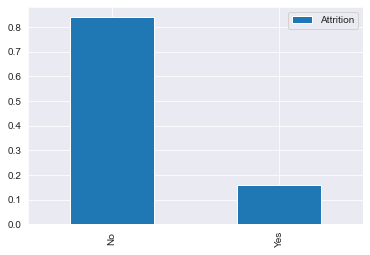

In [101]:
#Checks
#Proportion in training data
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [102]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

In [103]:
#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

So, the preprocessing is done, now we have to apply KNN to the dataset. 


Model Execution code: Using KNeighborsClassifier for finding the best number of neighbour with the help of misclassification error. 

The optimal number of neighbors is  19 


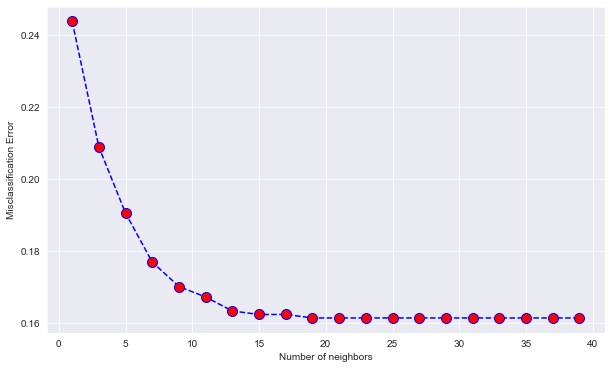

In [105]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


# Prediction Score 

In [106]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train = True):
	if train:
		print("Train Result:")
		print("------------")
		print("Classification Report: \n {}\n".format(classification_report(
				y_train, clf.predict(X_train))))
		print("Confusion Matrix: \n {}\n".format(confusion_matrix(
				y_train, clf.predict(X_train))))

		res = cross_val_score(clf, X_train, y_train,
							cv = 10, scoring ='accuracy')
		print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
		print("accuracy score: {0:.4f}\n".format(accuracy_score(
				y_train, clf.predict(X_train))))
		print("----------------------------------------------------------")
				
	elif train == False:
		print("Test Result:")
		print("-----------")
		print("Classification Report: \n {}\n".format(
				classification_report(y_test, clf.predict(X_test))))
		print("Confusion Matrix: \n {}\n".format(
				confusion_matrix(y_test, clf.predict(X_test))))
		print("accuracy score: {0:.4f}\n".format(
				accuracy_score(y_test, clf.predict(X_test))))
		print("-----------------------------------------------------------")
		
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       863
         Yes       0.71      0.13      0.22       166

    accuracy                           0.85      1029
   macro avg       0.78      0.56      0.57      1029
weighted avg       0.83      0.85      0.81      1029


Confusion Matrix: 
 [[854   9]
 [144  22]]

Average Accuracy: 	 0.8231
Accuracy SD: 		 0.0121
accuracy score: 0.8513

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.98      0.91       370
         Yes       0.25      0.03      0.05        71

    accuracy                           0.83       441
   macro avg       0.55      0.51      0.48       441
weighted avg       0.75      0.83      0.77       441


Confusion Matrix: 
 [[364   6]
 [ 69   2]]

accuracy score: 0.829

# Cross Validate


To check the accuracy of the pipeline


In [108]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)


In [109]:
scores['test_score'].mean()


0.8396590101823348

Average accuracy of pipeline with Decision Tree Classifier is 83.48%



# Cross-Validation and Hyper Parameters Tuning


Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters



Declare a hyper-parameters to fine tune the Decision Tree Classifier


Decision Tree is a greedy alogritum it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree

In [110]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [111]:
pipelines['clf']


Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

# Decision Tree classifier with gini index


**Fit and tune models with cross-validation**


Now that we have our pipelines and hyperparameters dictionaries declared, we're ready to tune our models with cross-validation.



We are doing 5 fold cross validation


In [112]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [114]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                             

In [115]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 7,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 10}

In [116]:
#Display the best score for the fitted model
clf_model.best_score_

0.8561780724603363

In [117]:
#Display the best score for the fitted model
clf_model.best_score_

0.8561780724603363

In [118]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=10,
                       random_state=100)

In [119]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

# Model Performance Evaluation


**On Test Data**


In [120]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [121]:
tree_test_pred.head()


,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [122]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [123]:
#merging the predicted data and its probability value

tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)

In [124]:
tree_test_pred.head()


,actual,predicted,predicted_prob
34,Yes,Yes,0.632184
1432,No,No,0.220859
334,No,No,0.072165
1068,Yes,No,0.145985
736,No,No,0.072165


In [125]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)

In [126]:
tree_test_pred.head()


,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,0.632184,1,1
1432,No,No,0.220859,0,0
334,No,No,0.072165,0,0
1068,Yes,No,0.145985,1,0
736,No,No,0.072165,0,0


# Confusion Matrix


The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [127]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 21,  50],
       [ 26, 344]], dtype=int64)

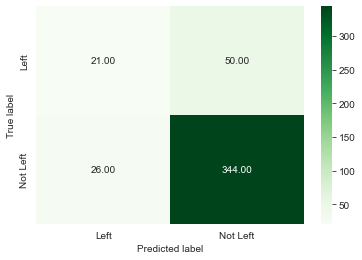

In [128]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [129]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.6128


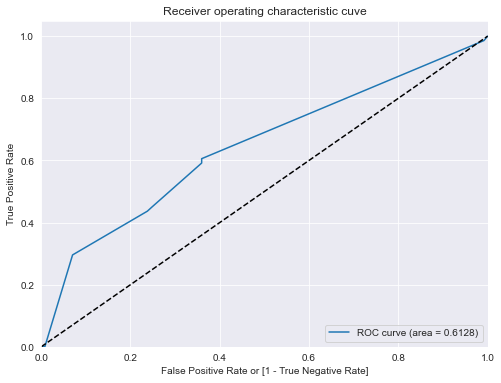

In [130]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

From the ROC Curve, we have a choice to make depending on the value we place on true positive and tolerance for false positive rate



* If we wish to find the more people who are leaving, we could increase the true positive rate by adjusting the probability cutoff for classification. However by doing so would also increase the false positive rate. we need to find the optimum value of cutoff for classification

**Metrics**

*  Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized

* Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive

In [131]:
#calculating the recall score

print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Recall Score: 29.577


In [132]:
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Precision Score: 44.681


In [133]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       370
           1       0.45      0.30      0.36        71

    accuracy                           0.83       441
   macro avg       0.66      0.61      0.63       441
weighted avg       0.80      0.83      0.81       441

